# <center>Summary of a seminal paper on Deep Learning: Generative Adversarial Nets</center>

**<center>Pablo Cabra Montes, Alexandra Pritoula, Alice Scattolin <br/>
Geneva School of Economics and Management (GSEM)<br/>
Université de Genève (UNIGE), <br/>
Genève, Suisse</center>**


## IMPLEMENTATION ON MINST DATASET

In [8]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [9]:
torch.manual_seed(111) # Set seet to ensure reproducibility
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # First transform the data into Tensor data type, then it normalize it
train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform) # Download the dataset
batch_size = 32 # Define the size of the minibatcg
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True) # Pass the data through the transformation process

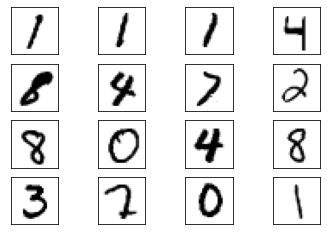

In [10]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [33]:
# DISCRIMINTATOR CLASS
# It is a MLP neural network defined in a sequential way using nn.Sequential()
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__() # Run .__init__() from nn.Module.
        self.model = nn.Sequential(
             nn.Linear(784, 1024), # The input has 784 elements. The first hidden layer is composed of 1024 neurons.
             nn.LeakyReLU(), # The first hidden layer has a ReLU activation function.
             nn.Dropout(0.4), # It's purpose is to avoid overfitting.
             nn.Linear(1024, 512), # The second hidden layer is composed of 512 neurons.
             nn.LeakyReLU(), # The second hidden layer has a ReLU activation function.
             nn.Dropout(0.4), # It's purpose is to avoid overfitting.
             nn.Linear(512, 256), # The third hidden layer is composed of 256 neurons.
             nn.LeakyReLU(), # The third hidden layer has a ReLU activation function.
             nn.Dropout(0.4), # It's purpose is to avoid overfitting.
             nn.Linear(256, 1), # The output layer has one dimension.
             nn.Sigmoid(), # The output layer has a sigmoidal activation to represent a probability
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output
    

discriminator = Discriminator()

In [34]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
             nn.Linear(100, 256), # The input has 100 elements. The first hidden layer is composed of 256 neurons.
             nn.ReLU(), # The first hidden layer has a ReLU activation function
             nn.Linear(256, 512), # The second hidden layer is composed of 512 neurons.
             nn.ReLU(), # The second hidden layer has a ReLU activation function
             nn.Linear(512, 1024), # The third hidden layer is composed of 1024 neurons.
             nn.ReLU(), # The third hidden layer has
             nn.Linear(1024, 784), # The output layer is composed of 784 neurons.
             nn.Tanh(), # The output layer has hyperbolic tangent function  activation function.
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator()

In [35]:
# PARAMETERS TO TRAIN THE MODEL
lr = 0.0003 # Learning rate
num_epochs = 50 # Numer of repetitions of the training.
loss_function = nn.BCELoss() # Loss function

# OPTIMIZATION METHOD USED TO TRAIN THE MODEL
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr) # Stochastic gradient descent to train the discriminator model
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr) # Stochastic gradient descent to train the generative model

In [36]:
# TRAINING THE MODEL
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 100))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 5 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5671888589859009
Epoch: 0 Loss G.: 1.097198247909546
Epoch: 5 Loss D.: 0.3823340833187103
Epoch: 5 Loss G.: 1.9380278587341309
Epoch: 10 Loss D.: 0.5509809255599976
Epoch: 10 Loss G.: 1.0160164833068848
Epoch: 15 Loss D.: 0.655619204044342
Epoch: 15 Loss G.: 0.8746925592422485
Epoch: 20 Loss D.: 0.5572047233581543
Epoch: 20 Loss G.: 1.082823634147644
Epoch: 25 Loss D.: 0.6267121434211731
Epoch: 25 Loss G.: 0.9628877639770508
Epoch: 30 Loss D.: 0.6126877069473267
Epoch: 30 Loss G.: 0.7569130063056946
Epoch: 35 Loss D.: 0.6373224258422852
Epoch: 35 Loss G.: 0.9090270400047302
Epoch: 40 Loss D.: 0.7307506799697876
Epoch: 40 Loss G.: 0.7650911808013916
Epoch: 45 Loss D.: 0.6681863069534302
Epoch: 45 Loss G.: 0.9464077949523926


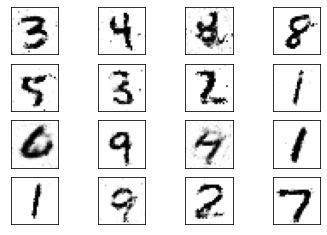

In [39]:
# CHECK THE SAMPLES
latent_space_samples = torch.randn(batch_size, 100)
generated_samples = generator(latent_space_samples)

generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])